## HW1 - Basics of ML
Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

#### Important notes: 

1. On this and future homeworks, depending on the data size and your hardware configuration, experiments may take too long if you use the complete dataset. This may be challenging, as you may need to run multiple experiments. So, if an experiment takes too much time, start first with a smaller sample that will allow you to run your code within a reasonable time. Once you complete all tasks, before the final submission, you can allow longer run times and run your code with the complete set. However, if this is still taking too much time or causing your computer to freeze, it will be OK to submit experiments using a sample size that is feasible for your setting (indicate it clearly in your submission). Grading of the homework will not be affected from this type of variations in the design of your experiments.


2. You can switch between 2D image data and 1D vector data using the numpy functions flatten() and resize()

### S1: Filtering the data
- Load MNIST FASHION dataset (hint: use the practice notebook)
- Select a training set with the first n=100 samples from each category
- Select a testing set with the first n=100 samples from each category
- Create a numpy matrix named mat_avg defined as:
  A 10 x 2 matrix with the average intensity of all images in each category for the training and testing sets (rows: 10 categories, columns: average intensity in train set,  average intensity in test set)

Q1.1: Which category has the largest average intensity value in training data:   **coat**

Q1.2: Which category has the largest average intensity value in testing data:   **coat**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/h_/pxhj6fqj4y3fqkpmr3g9dd3c0000gq/T/ipykernel_38181/3459056358.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
## import fashion MNIST data using tensorflow
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(X_tr, Y_tr), (X_te, Y_te) = mnist.load_data() #create tuples for train/test

# shape of train/test sets
print('X_tr: ' + str(X_tr.shape))
print('Y_tr: ' + str(Y_tr.shape))
print('X_te:  '  + str(X_te.shape))
print('Y_te:  '  + str(Y_te.shape))

type(X_tr)

X_tr: (60000, 28, 28)
Y_tr: (60000,)
X_te:  (10000, 28, 28)
Y_te:  (10000,)


numpy.ndarray

In [4]:
#unique labels - there are 10 unique labels
print('Unique labels: ' + str(np.unique(Y_tr, return_counts=True)))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Unique labels: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


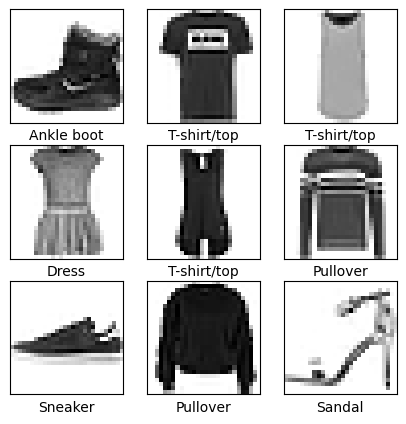

In [5]:
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid("off")
    plt.imshow(X_tr[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_tr[i]])

In [6]:
# create samples
def sample_data(X, Y):
    # Initialize containers for the sampled data
    X_sampled = []
    Y_sampled = []

    # Iterate over each unique label in Y
    for label in np.unique(Y):
        # Find indices where the label occurs
        indices = np.where(Y == label)[0]
        
        # Select the first 100 observations for this label
        selected_indices = indices[:100]
        
        # Append the selected observations to the sampled data containers
        X_sampled.append(X[selected_indices])
        Y_sampled.append(Y[selected_indices])
    
    # Concatenate the list of arrays into a single array
    X_sampled = np.vstack(X_sampled)
    Y_sampled = np.concatenate(Y_sampled)
    
    return X_sampled, Y_sampled

X_tr_2, Y_tr_2 = sample_data(X_tr, Y_tr)
X_te_2, Y_te_2 = sample_data(X_te, Y_te)

In [7]:
# shape of final train/test sets
print('X_train: ' + str(X_tr_2.shape))
print('Y_train: ' + str(Y_tr_2.shape))
print('X_test:  '  + str(X_te_2.shape))
print('Y_test:  '  + str(Y_te_2.shape))

X_train: (1000, 28, 28)
Y_train: (1000,)
X_test:  (1000, 28, 28)
Y_test:  (1000,)


In [8]:

def calculate_average_intensity(X, Y):
    # Initialize a dictionary to store the average intensity for each label
    average_intensities = {}
    
    # Get unique labels
    unique_labels = np.unique(Y)
    
    # Iterate over each label to group pictures and calculate average intensity
    for label in unique_labels:
        # Find indices of pictures with the current label
        indices = np.where(Y == label)[0]
        
        # Select the pictures with the current label
        pictures = X[indices]
        
        # Calculate the average intensity for the current label
        # For each picture, calculate its mean intensity, then calculate the mean of these means for the label
        average_intensity = np.mean([np.mean(picture) for picture in pictures])
        
        # Store the average intensity in the dictionary
        average_intensities[label] = average_intensity

        # Convert the dictionary to a numpy array
        intensities_np = list(average_intensities.values())
    return intensities_np


intensity_train = calculate_average_intensity(X_tr, Y_tr)
intensity_test = calculate_average_intensity(X_te, Y_te)

mat_avg = np.column_stack((intensity_train, intensity_test))

for i in range(10):
    print('Label: ' + class_names[i])
    print(' Train: ' + str(mat_avg[i, 0]))
    print(' Test: ' + str(mat_avg[i, 1]))
    print('')

Label: T-shirt/top
 Train: 83.02998044217686
 Test: 83.62365688775509

Label: Trouser
 Train: 56.84085522959183
 Test: 56.98140816326531

Label: Pullover
 Train: 96.058762542517
 Test: 95.35267474489795

Label: Dress
 Train: 66.01890858843538
 Test: 66.39501658163265

Label: Coat
 Train: 98.25800552721088
 Test: 99.74509183673469

Label: Sandal
 Train: 34.86754655612245
 Test: 34.75733163265306

Label: Shirt
 Train: 84.60511989795917
 Test: 84.85841326530613

Label: Sneaker
 Train: 42.76207227891157
 Test: 43.019793367346935

Label: Bag
 Train: 90.15715284863944
 Test: 90.13894387755101

Label: Ankle boot
 Train: 76.80511840986395
 Test: 76.59333545918366



### S2: Finding the average image
- Find and display a single average image of all shoes (categories 'Sandal', 'Sneaker', 'Ankle boot') in training and testing data (use the smaller sample you created)

In [18]:
shoe_list = [5, 7, 9]

# training set 
# make a mask
mask = np.isin(Y_tr_2, shoe_list)

# Use the mask to filter Y_tr_2
y_tr_shoe = Y_tr_2[mask]

# Use the same mask to filter X_tr_2
x_tr_shoe = X_tr_2[mask]


# testing set
# make a mask
mask = np.isin(Y_te_2, shoe_list)

# Use the mask to filter Y_te_2
y_te_shoe = Y_te_2[mask]

# Use the same mask to filter X_te_2
x_te_shoe = X_te_2[mask]

Text(0.5, 1.0, 'The average shoe')

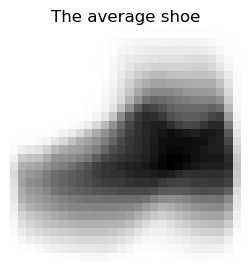

In [19]:
def avg_img(x_train, x_test, y_train, y_test):
# create list of shoe classes
   # shoes = [5, 7, 9]
    shoe_list = []

# for-loop: iterate through train/test images and append to list if label is shoe
    for i in range(len(x_train)):
       # if y_train[i] in shoes:
        shoe_list.append(x_train[i])
        #if y_test[i] in shoes:
        shoe_list.append(x_test[i])

# convert list to numpy array
    shoe_list_np = np.array(shoe_list)

# use np.mean to calculate average shoe 
    avg_shoe = np.mean(shoe_list_np, axis = 0) # axis = 0 is crucial, otherwise it just calculates the mean intensity across all pixels
    return avg_shoe 


# avg shoe
avg_shoe = avg_img(x_tr_shoe, x_te_shoe, y_tr_shoe, y_te_shoe)

# map average image
plt.figure(figsize=(3,3)) 
plt.xticks([])
plt.yticks([])
plt.grid("off")
plt.box(False)  
plt.imshow(avg_shoe, cmap=plt.cm.binary)
plt.title("The average shoe")

### S3: Image distances
In the training set, find the shoe image that is most dissimilar from the mean shoe image. Show it as a 2D image  
In the training set, find the shoe image that is most similar from the mean shoe image. Show it as a 2D image  
Do the same for the testing set  
Hint: You can use the "euclidean distance" as your similarity metric. Given that an image i is represented with a flattened feature vector v_i , and the second image j with v_m, the distance between these two images can be calculated using the vector norm of their differences ( | v_i - v_j | )

Q3.1: What is the index of most similar shoe image in the training set: 189

Q3.2: What is the index of most dissimilar shoe image in the training set: 236

Q3.1: What is the index of most dissimilar shoe image in the testing set: 257


In [20]:
# function: shoe distance comparison
def shoe_dist(mean_shoe, shoe_x, shoe_y, metric):
    dist_list = []
    shoes = [5, 7, 9]

    for i in range(len(shoe_x)):
        dist = np.abs(mean_shoe - shoe_x[i])
        dist_mean = np.mean(dist)
        dist_list.append(dist_mean)

    if metric == min:
        index = dist_list.index(min(dist_list))
    elif metric == max:
        index = dist_list.index(max(dist_list))

    return shoe_x[index], index

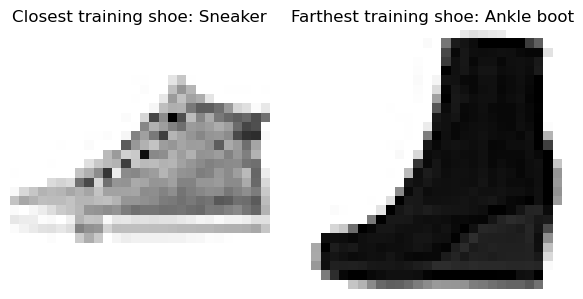

In [21]:
# training set

closest_tr, closest_tr_index = shoe_dist(avg_shoe, x_tr_shoe, y_tr_shoe, min)
farthest_tr, farthest_tr_index = shoe_dist(avg_shoe, x_tr_shoe, y_tr_shoe, max)

# Create a figure to hold the subplots
plt.figure(figsize=(6,3)) # Adjust the figure size as needed

# Plot the closest shoe
plt.subplot(1, 2, 1) # (rows, columns, subplot number)
plt.xticks([])
plt.yticks([])
plt.box(False) # Use False instead of "off"
plt.grid(False) # Use False instead of "off"
plt.imshow(closest_tr, cmap=plt.cm.binary)
plt.title("Closest training shoe: " + class_names[y_tr_shoe[closest_tr_index]])

# Plot the farthest shoe
plt.subplot(1, 2, 2) # (rows, columns, subplot number)
plt.xticks([])
plt.yticks([])
plt.box(False) # Use False instead of "off"
plt.grid(False) # Use False instead of "off"
plt.imshow(farthest_tr, cmap=plt.cm.binary)
plt.title("Farthest training shoe: " + class_names[y_tr_shoe[farthest_tr_index]])

plt.tight_layout() # Adjust subplots to fit into the figure area.
plt.show() # Display the figure with the plots


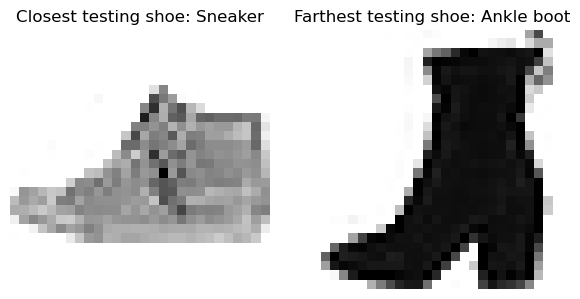

In [13]:
# testing set

closest_te, closest_te_index = shoe_dist(avg_shoe, x_te_shoe, y_te_shoe, min)
farthest_te, farthest_te_index = shoe_dist(avg_shoe, x_te_shoe, y_te_shoe, max)

# Create a figure to hold the subplots
plt.figure(figsize=(6,3)) # Adjust the figure size as needed

# Plot the closest shoe
plt.subplot(1, 2, 1) # (rows, columns, subplot number)
plt.xticks([])
plt.yticks([])
plt.box(False) # Use False instead of "off"
plt.grid(False) # Use False instead of "off"
plt.imshow(closest_te, cmap=plt.cm.binary)
plt.title("Closest testing shoe: " + class_names[y_te_shoe[closest_te_index]])

# Plot the farthest shoe
plt.subplot(1, 2, 2) # (rows, columns, subplot number)
plt.xticks([])
plt.yticks([])
plt.box(False) # Use False instead of "off"
plt.grid(False) # Use False instead of "off"
plt.imshow(farthest_te, cmap=plt.cm.binary)
plt.title("Farthest testing shoe: " + class_names[y_te_shoe[farthest_te_index]])

plt.tight_layout() # Adjust subplots to fit into the figure area.
plt.show() # Display the figure with the plots

In [22]:
# most similar/dissimilar shoes from average shoe
print('Most similar shoe in training set: ' + class_names[y_tr_shoe[closest_tr_index]] + " (" + str(closest_tr_index) + ")")
print('Most dissimilar shoe in training set: ' + class_names[y_tr_shoe[farthest_tr_index]] + " (" + str(farthest_tr_index) + ")")  
print("")   
print('Most similar shoe in testing set: ' + class_names[y_te_shoe[closest_te_index]] + " (" + str(closest_te_index) + ")")  
print('Most dissimilar shoe in testing set: ' + class_names[y_te_shoe[farthest_te_index]] + " (" + str(farthest_te_index) + ")") 

Most similar shoe in training set: Sneaker (189)
Most dissimilar shoe in training set: Ankle boot (236)

Most similar shoe in testing set: Sneaker (176)
Most dissimilar shoe in testing set: Ankle boot (257)


### S4: Train a classifier to differentiate shoes from no-shoes
- Create new labels for train and test images as shoes (1) or no-shoes (0)
- Train 2 different classifiers on the training set (SVM and Random Forest). Apply the classifiers on the testing data
- Display the confusion matrix of each classifier
- Display 4 images that are mis-classified as shoes by each classifier

Q1.1: What is the testing accuracy of each classifier:   ___

Q1.2: What is the category (original label) that is most frequently mis-classified as a shoe:   ___

Q1.3: What is the category (original label) that is most frequently mis-classified as a non-shoe:   ___


In [15]:
# new binary label: shoe vs not shoe

# training set
y_tr_bi = Y_tr_2.copy()

for i in range(len(y_tr_bi)):
    if y_tr_bi[i] in y_tr_shoe:
        y_tr_bi[i] = 1
    else:
        y_tr_bi[i] = 0

# testing set
y_te_bi = Y_te_2.copy()

for i in range(len(y_te_bi)):
    if y_te_bi[i] in y_te_shoe:
        y_te_bi[i] = 1
    else:
        y_te_bi[i] = 0

## Support Vector Machine

In [25]:
Y = y_te_bi.copy()
X = X_te_2.reshape(X_te_2.shape[0], -1)
print(X.shape)
print(Y.shape)

(1000, 784)
(1000,)


In [26]:
#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4 
, random_state=42)

In [27]:
from sklearn import svm

# Create the svm classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model
clf.fit(X_train, y_train)

# Predict the label
y_pred = clf.predict(X_test)

In [28]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [29]:
# Train the model
clf.fit(X_test, y_test)

# Predict the label
y_pred = clf.predict(X_train)

print('Accuracy: ', metrics.accuracy_score(y_train, y_pred))

Accuracy:  0.9966666666666667


### Bonus:

- In question S4 you have a chance to discard one of image categories that are part of the non-shoe set. Which category would you prefer to discard? Explain and justify with data
